In [15]:
import importlib
import utils
importlib.reload(utils)
from utils import *

In [16]:
frame = skimage.io.imread(r'fluid.jpg')
frame.shape

(2304, 3072, 3)

(700, 700, 295)


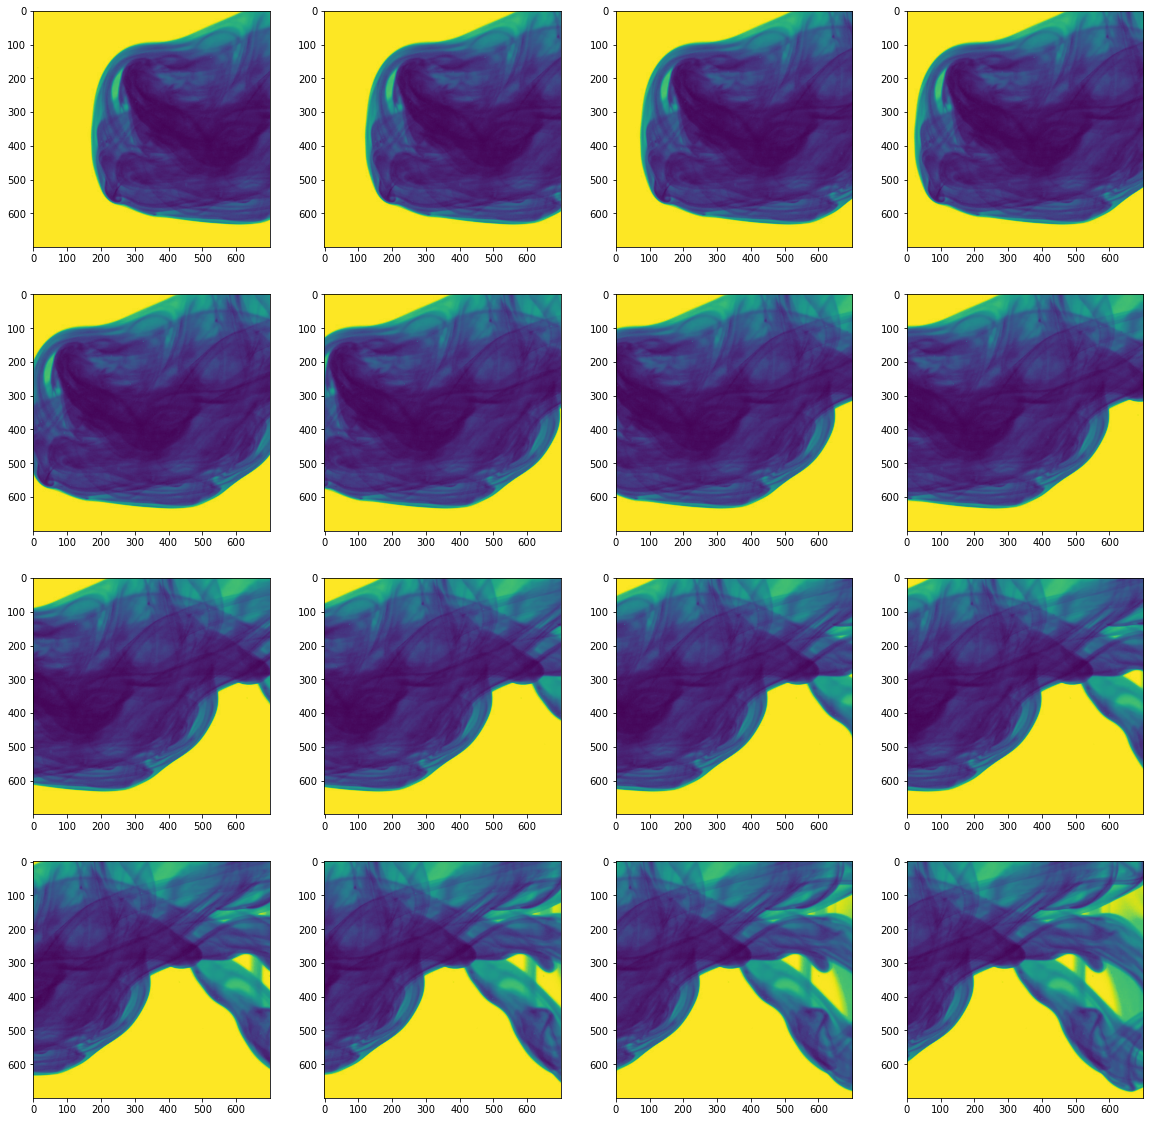

In [17]:
im_stack, coord_list = shift_images(shift_x=5,shift_y=0,frame=frame,dim=700,x0=900,y0=1400)
print(im_stack.shape)
fig,axes = plt.subplots(4,4,figsize=(20,20)) # plot every 10 image
for i, ax in enumerate(axes.flatten()):
    ax.imshow(im_stack[:,:,i*10])

plt.show()

In [7]:
def derivatives(I1g, I2g, plot_figure=False):
    kernel_x = np.array([[-1., 1.], [-1., 1.]])
    kernel_y = np.array([[-1., -1.], [1., 1.]])
    kernel_t = np.array([[1., 1.], [1., 1.]])#*.25
    # w = window_size//2 # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = I1g / 255. # normalize pixels
    I2g = I2g / 255. # normalize pixels
    # for each point, calculate I_x, I_y, I_t
    mode = 'same'
    fx = scipy.signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode) #compute gradient across the x axis through convolving, works the same as taking one column - adjacent column
    fy = scipy.signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode) #compute gradient across the y axis
    ft = scipy.signal.convolve2d(I2g, kernel_t, boundary='symm', mode=mode) + scipy.signal.convolve2d(I1g, -kernel_t, boundary='symm', mode=mode)
    laplacian = scipy.ndimage.laplace(I1g)
    d_dict = {'Ix':fx,'Iy':fy,'Laplacian':laplacian,'It':ft,'Image1':I1g,'Image2':I2g}

    def normalise(im):
        max = im.max()
        min = im.min()
        return (im - min)/(max-min)

    if plot_figure is True:
        fig,axes = plt.subplots(2,3,figsize=(15,10))
        for ax, (name,im) in zip(axes.flatten(),d_dict.items()):
            xim = ax.imshow(normalise(im))
            ax.set_title(name)
            plt.colorbar(xim,ax=ax)
        plt.show()
        plt.tight_layout()

    return fx,fy,ft

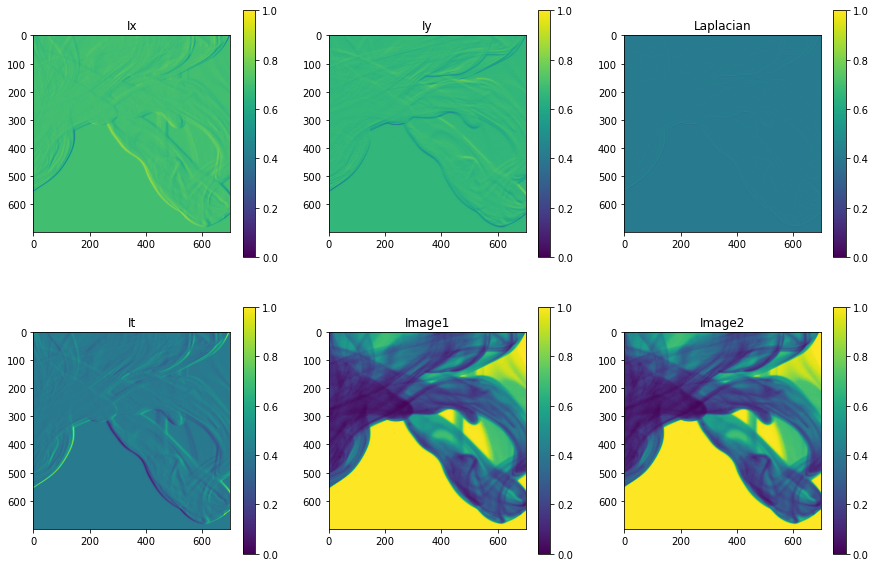

<Figure size 432x288 with 0 Axes>

In [19]:
fx,fy,ft = derivatives(im_stack[:,:,160], im_stack[:,:,161], plot_figure=True)

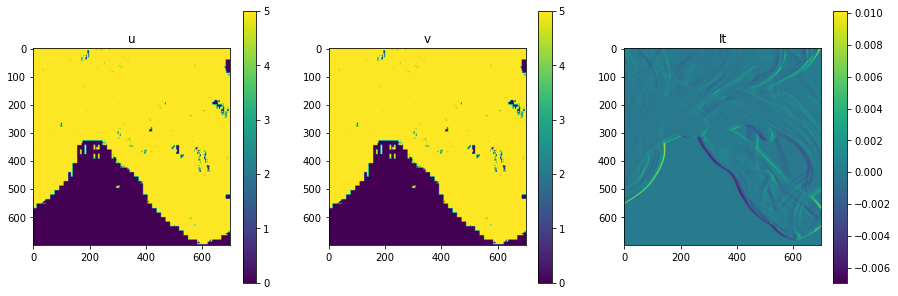

In [20]:
def create_training(ft):
    u = np.zeros(ft.shape)
    v = np.zeros(ft.shape)
    u[ft!=0] = 5
    v[ft!=0] = 5

    fig, axes = plt.subplots(1,3,figsize=(15,5))
    for ax,(n,vel) in zip(axes.flatten(), {'u':u,'v':v,'It':ft}.items()):
        xim = ax.imshow(vel)
        ax.set_title(n)
        plt.colorbar(xim,ax=ax)
    plt.show()

    return 

create_training(ft)